In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import utils
import shutil

In [2]:
data, n_samples = utils.read_birth_life_data('data/birth_life_2010.txt')

In [3]:
def hubber_loss(y_pred, y, delta = 14.0):
    residual = tf.abs(y_pred - y)
    print (0.5*tf.square(residual))
    def f1(): return 0.5*tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    tf.cond(residual < delta, f1, f2)

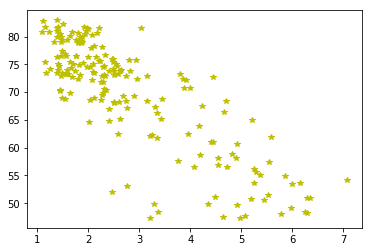

In [4]:
type(data)
plt.plot(data[:,0], data[:, 1], 'y*')

In [5]:
learning_rate = 0.01
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((data[:, 0], data[:, 1]))
dataset.output_types
iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

with tf.variable_scope("my_var", reuse = tf.AUTO_REUSE):
    w = tf.get_variable(name= "weight", initializer=tf.constant(0.0))
    b = tf.get_variable(name= "bias", initializer=tf.constant(0.0))
y_pred = w*X+b
loss = tf.square(y_pred - Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
init = tf.global_variables_initializer()
start = time.time()
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        sess.run(iterator.initializer)
        total_loss = 0;
        try:
            while True:
                _, l = sess.run([optimizer, loss])
        except:
            pass
        
        print("loss Epoch{0}:{1}".format(i, l))
       
    w_out, b_out = sess.run([w, b])
    print (w_out, b_out)
print("TimeTaken %f :"%(time.time() - start))

loss Epoch0:244.96446228027344
loss Epoch1:250.1955108642578
loss Epoch2:224.2191619873047
loss Epoch3:200.64324951171875
loss Epoch4:179.65052795410156
loss Epoch5:160.95668029785156
loss Epoch6:144.30531311035156
loss Epoch7:129.4681396484375
loss Epoch8:116.24217987060547
loss Epoch9:104.44866180419922
loss Epoch10:93.92801666259766
loss Epoch11:84.53882598876953
loss Epoch12:76.15562438964844
loss Epoch13:68.66739654541016
loss Epoch14:61.97585678100586
loss Epoch15:55.99274444580078
loss Epoch16:50.640403747558594
loss Epoch17:45.85005569458008
loss Epoch18:41.55985641479492
loss Epoch19:37.715755462646484
loss Epoch20:34.26887130737305
loss Epoch21:31.176664352416992
loss Epoch22:28.400665283203125
loss Epoch23:25.906858444213867
loss Epoch24:23.66493797302246
loss Epoch25:21.64838409423828
loss Epoch26:19.83293914794922
loss Epoch27:18.197444915771484
loss Epoch28:16.722610473632812
loss Epoch29:15.391937255859375
loss Epoch30:14.19030475616455
loss Epoch31:13.104253768920898
lo

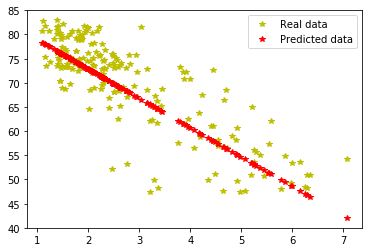

In [6]:
plt.plot(data[:, 0], data[:, 1], 'y*', label = "Real data")
plt.plot(data[:, 0], data[:, 0]*w_out + b_out, 'r*', label = "Predicted data")
plt.legend()


In [8]:
mnist_folder = "data/mnist"
def safe_mkdir(path):
    try:
        os.mkdir(path)
    except OSError:
        pass


In [8]:
import urllib
import gzip
import shutil
def download_one_file(download_url, local_dest, unzip_and_remove = False):
    if os.path.exists(local_dest) or os.path.exists(local_dest[:-3]) :
        print('file %s already present'%local_dest)
    else:
        print('Downloading %s' %download_url)
        local_file, _ = urllib.request.urlretrieve(download_url, local_dest)
        print(local_file)
        if unzip_and_remove:
                with gzip.open(local_dest, 'rb') as f_in, open(local_dest[:-3], 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
                os.remove(local_dest)
                    
                                        


In [9]:

    
def download_mnist(path):
    safe_mkdir(path)
    url = 'http://yann.lecun.com/exdb/mnist/'
    filenames = ['train-images-idx3-ubyte.gz',
                'train-labels-idx1-ubyte.gz',
                't10k-images-idx3-ubyte.gz',
                't10k-labels-idx1-ubyte.gz']
    for filename in filenames:
        download_url = os.path.join(url, filename)
        local_dest = os.path.join(path , filename)
        print (download_url)
        download_one_file(download_url, local_dest,True)
    

data/mnist\train-images-idx3-ubyte.gz already exists
data/mnist\train-labels-idx1-ubyte.gz already exists
data/mnist\t10k-images-idx3-ubyte.gz already exists
data/mnist\t10k-labels-idx1-ubyte.gz already exists
(55000, 784)


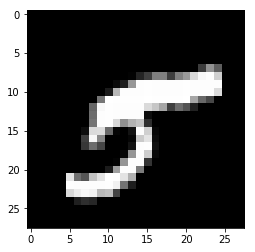

In [70]:
utils.download_mnist(mnist_folder)
train, val, test = utils.read_mnist(mnist_folder, flatten= True)
print(train[0].shape)
plt.imshow(train[0][0].reshape([28, 28]), cmap= 'gray')

In [14]:
# declaring parameters
batch_size = 128
learning_rate = 0.01
n_epochs = 30
n_train = 60000
n_test = 10000

In [15]:
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(10000)
train_data = train_data.batch(batch_size)
test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)
iterator = tf.data.Iterator.from_structure(train_data.output_types, train_data.output_shapes)
train_init = iterator.make_initializer(train_data)
test_int = iterator.make_initializer(test_data)
image, label = iterator.get_next()
with tf.variable_scope("logistic", reuse = tf.AUTO_REUSE):
    w = tf.get_variable(name = 'weight', shape=(784, 10), initializer=tf.random_normal_initializer(0.0, 0.01))
    b = tf.get_variable(name = 'bias', shape=(1, 10), initializer=tf.zeros_initializer())
       
logits = tf.matmul(image, w) + b                        
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = label, logits = logits)
loss = tf.reduce_mean(entropy)
pred = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(label, axis = 1), tf.argmax(logits, 1))
float_pred = tf.cast(correct_pred, tf.float32)
type(float_pred)
accuracy = tf.reduce_sum(float_pred)
type(correct_pred)


tensorflow.python.framework.ops.Tensor

In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(loss)

In [37]:
sess.runwriter = tf.summary.FileWriter('./graphs/logreg/', tf.get_default_graph())
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(w.shape)
    print(b.shape)
    start_time = time.time();
    for i in range(n_epochs):
        sess.run(train_init)
        print(sess.run(tf.shape(label)))
        print(sess.run(tf.shape(logits)))
        print(sess.run(tf.shape(entropy)))
        print(sess.run(tf.shape(entropy)))
        print(type(float_pred))
        print(type(correct_pred))
        print(sess.run(tf.shape(image[0, :])))
        #print(sess.run(image[0, :]))
        total_loss = 0
        n_batch = 0
        try:
            while True :
                _, l = sess.run([optimizer, loss])
                
                total_loss +=l
                n_batch +=1
        except tf.errors.OutOfRangeError:
            pass
        total_loss /= n_batch
        print("Epoch {0}, Average Loss {1}\n".format(i, total_loss))
    print('Training Time Elasped : {0} seconds\n'.format(time.time() - start_time))
    
    print('Testing the Model\n')
    sess.run(test_int)
    total_correct_pred = 0
    try:
        while True:
            accuracy_batch = sess.run(accuracy)
            total_correct_pred += accuracy_batch
    except tf.errors.OutOfRangeError:
        pass
    print("Test Accuracy is : {0}\n".format(total_correct_pred/n_test))
    writer.close()
            


(784, 10)
(1, 10)
[128  10]
[128  10]
[128]
[128]
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
[784]
[28 28]
Epoch 0, Average Loss 0.36467499408363735

[128  10]
[128  10]
[128]
[128]
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
[784]
[28 28]
Epoch 1, Average Loss 0.29544389877520816

[128  10]
[128  10]
[128]
[128]
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
[784]
[28 28]
Epoch 2, Average Loss 0.28232713640085966

[128  10]
[128  10]
[128]
[128]
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
[784]
[28 28]
Epoch 3, Average Loss 0.2790534822838687

[128  10]
[128  10]
[128]
[128]
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
[784]
[28 28]
Epoch 4, Average Loss 0.2723188959411892

[128  10]
[128  10]
[128]
[128]
<class 'tensorflo